## Metropolis-Hastings 알고리즘 설명

(1) 목적

Target distribution $p(x)$를 따르는 $X \sim p(x)$를 샘플링

(2) 조건

* $p(x)$에 비례하는 $f(x)$를 알고 있어야 함. ($p(x)$를 몰라도 샘플링 가능)
* Proposal distribution $q(x^t|x)$를 정의해 주어야 함. (보통은 정규분포를 사용)

(3) 절차

Step 1) $x^{(0)}$을 초기화

Step 2) 다음 과정을 반복

$i=0 \sim N-1$

$u \sim U(0,1)$를 샘플

$x^* \sim q(x^*|x^{(i)}$를 샘플

$u < A(x^{(i)},x^*)$이면 $x^{(i+1)}=x^*$

$u \leq A(x^{(i)},x^*)$이면 $x^{(i+1)}=x^{(i)}$

여기서,

$A(x^{(i)},x^*)=min\left(1,\frac{f(x^*)q(x^{(i)}|x^*}{f(x)^{(i)}q(x^*|x^{(i)})} \right)$


(4) 예제

Proposal distrigution $q(x^t|x)$를 "평균이 x이고 분산이 100인 정규분포"로 설정

Target distribution을 $p(x) \propto 0.3e^{-0.2x^2}+0.7e^{-0.2(x-10)^2}$로 설정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

In [3]:
def f(x): return 0.3*np.exp(-0.2*x**2)+0.7*np.exp(-0.2*(x-10)**2)
def q(xt,x): return norm.pdf(xt,loc=x,scale=100)
def q_sample(x): return norm.rvs(loc=x,scale=100)
def u_sample(l,u): return uniform.rvs(l,u)
def A(xi,xs): return min(1,(f(xs)*q(xi,xs))/(f(xi)*q(xs,xi)))

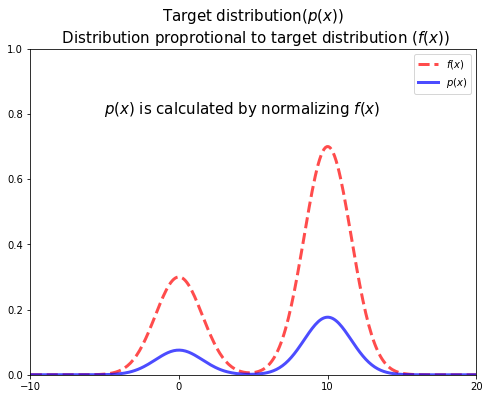

In [4]:
var = np.linspace(-50,50,1000);
prop_tar_dist=f(var);
tar_dist = prop_tar_dist/np.trapz(prop_tar_dist,var); # 정규화
plt.figure(figsize=(8,6));
plt.plot(var,prop_tar_dist,'r--',label='$f(x)$',lw=3,alpha=0.7);
plt.plot(var,tar_dist,'b-',label='$p(x)$',lw=3,alpha=0.7);
plt.xlim(-10,20); plt.ylim(0,1);
plt.xticks(np.linspace(-10,20,4));
plt.legend();
plt.title('Target distribution($p(x)$) \n Distribution proprotional to target distribution ($f(x)$)',size=15);
plt.text(-5,0.8,'$p(x)$ is calculated by normalizing $f(x)$',size=15);

In [6]:
N = 10000;
x = np.zeros(N);
for i in range(N-1):
    u = u_sample(0,1);
    xs = q_sample(x[i]);
    if u < A(x[i],xs):
        x[i+1] = xs
    else:
        x[i+1] = x[i]

In [7]:
plt.figure(figsize=(8,6));
plt.hist(x,bins=100,density=True,label='Samples',alpha=0.5,color='green');
plt.plot(var,tar_dist,'b',lw=3,alpha=0.7,label='$p(x)$');
plt.xlim(-10,20); plt.ylim(0,0.4);
plt.xticks([-10:20:10]); plt.yticks([0:0.4:0.1]);
plt.legend();
plt.title('Metropolis-Hastings Sampling Result');

SyntaxError: invalid syntax (<ipython-input-7-1d15ba0d09c9>, line 5)

In [11]:
np.mgrid[-3:3:.01]

array([-3.00000000e+00, -2.99000000e+00, -2.98000000e+00, -2.97000000e+00,
       -2.96000000e+00, -2.95000000e+00, -2.94000000e+00, -2.93000000e+00,
       -2.92000000e+00, -2.91000000e+00, -2.90000000e+00, -2.89000000e+00,
       -2.88000000e+00, -2.87000000e+00, -2.86000000e+00, -2.85000000e+00,
       -2.84000000e+00, -2.83000000e+00, -2.82000000e+00, -2.81000000e+00,
       -2.80000000e+00, -2.79000000e+00, -2.78000000e+00, -2.77000000e+00,
       -2.76000000e+00, -2.75000000e+00, -2.74000000e+00, -2.73000000e+00,
       -2.72000000e+00, -2.71000000e+00, -2.70000000e+00, -2.69000000e+00,
       -2.68000000e+00, -2.67000000e+00, -2.66000000e+00, -2.65000000e+00,
       -2.64000000e+00, -2.63000000e+00, -2.62000000e+00, -2.61000000e+00,
       -2.60000000e+00, -2.59000000e+00, -2.58000000e+00, -2.57000000e+00,
       -2.56000000e+00, -2.55000000e+00, -2.54000000e+00, -2.53000000e+00,
       -2.52000000e+00, -2.51000000e+00, -2.50000000e+00, -2.49000000e+00,
       -2.48000000e+00, -